# Branch Examples

In [1]:
# Initialize
import numpy as np
import matplotlib.pyplot as plt
from src.piecewise.polynomial import Polynomial
from src.piecewise.rational import Rational
from src.piecewise.branch import Branch

## Example 1: Basic usage

b1 = [1. 0.] / [1.] on [0.0,2.0)
b2 = [1. 1.] / [1.] on (1.0,3.0]
b1.domain = [0.0,2.0)
b2.domain = (1.0,3.0]


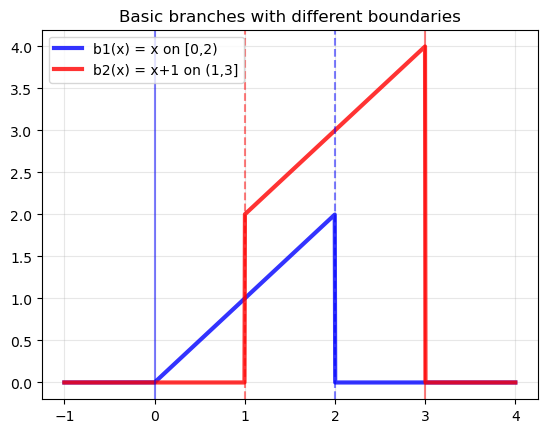

In [2]:
# Branch with closed-left and open-right boundary: [0, 2)
b1 = Branch(
    support=[0, 2],
    numerator=Polynomial([1, 0]),  # x
    denominator=Polynomial([1]),   # 1
    includes_left_boundary=True,
    includes_right_boundary=False,
    name="b1"
)

# Branch open-left and closed-right boundary (1, 3]
b2 = Branch(
    support=[1, 3],
    numerator=Polynomial([1, 1]),  # x + 1
    denominator=Polynomial([1]),   # 1
    includes_left_boundary=False,
    includes_right_boundary=True,
    name="b2"
)

print(f"b1 = {b1}")
print(f"b2 = {b2}")
print(f"b1.domain = {b1.domain}")
print(f"b2.domain = {b2.domain}")

# Graphs
x = np.linspace(-1, 4, 1000)
plt.plot(x, b1(x), 'b-', label='b1(x) = x on [0,2)', linewidth=3, alpha=0.8)
plt.plot(x, b2(x), 'r-', label='b2(x) = x+1 on (1,3]', linewidth=3, alpha=0.8)

# Show boundaries
plt.axvline(x=0, color='blue', linestyle='-', alpha=0.5)  # b1 left included
plt.axvline(x=2, color='blue', linestyle='--', alpha=0.5) # b1 right excluded
plt.axvline(x=1, color='red', linestyle='--', alpha=0.5)  # b2 left excluded
plt.axvline(x=3, color='red', linestyle='-', alpha=0.5)   # b2 right included

plt.title('Basic branches with different boundaries')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 2: Rational Branches

b3 = [1. 0. 1.] / [ 1. -5.] on [-2.0,2.0)
b3(0) = -0.200
b3(2) = -0.000
b3(3) = -0.000


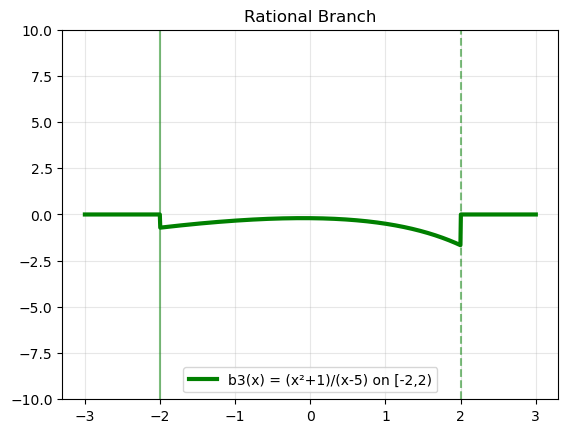

In [3]:
b3 = Branch(
    support=[-2, 2],
    numerator=Polynomial([1, 0, 1]),    # x² + 1
    denominator=Polynomial([1, -5]),    # x - 5
    includes_left_boundary=True,
    includes_right_boundary=False,
    name="b3"
)

print(f"b3 = {b3}")
print(f"b3(0) = {b3(0):.3f}")    # Inside the domain
print(f"b3(2) = {b3(2):.3f}")    # At the boundary (excluded) -> 0
print(f"b3(3) = {b3(3):.3f}")    # Outside domain -> 0

x2 = np.linspace(-3, 3, 1000)

plt.plot(x2, b3(x2), 'g-', label='b3(x) = (x²+1)/(x-5) on [-2,2)', linewidth=3)
plt.axvline(x=-2, color='green', linestyle='-', alpha=0.5)
plt.axvline(x=2, color='green', linestyle='--', alpha=0.5)
plt.ylim(-10, 10)
plt.title('Rational Branch')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 3: Numerical Operations

b1 + b2 = [2. 1.] / [1.] on (1.0,2.0)
b1 * b2 = [1. 1. 0.] / [1.] on (1.0,2.0)
b1 - b2 = [-1.] / [1.] on (1.0,2.0)


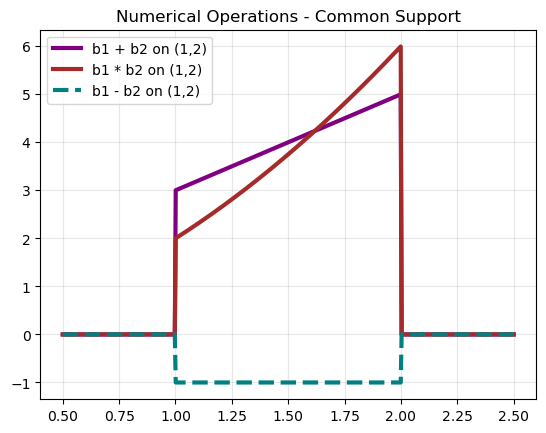

In [4]:
b4 = b1 + b2
b5 = b1 * b2
b6 = b1 - b2

print(f"b1 + b2 = {b4}")
print(f"b1 * b2 = {b5}")
print(f"b1 - b2 = {b6}")

# Το common support των b1 και b2 είναι (1, 2)
x3 = np.linspace(0.5, 2.5, 500)
plt.plot(x3, b4(x3), 'purple', label='b1 + b2 on (1,2)', linewidth=3)
plt.plot(x3, b5(x3), 'brown', label='b1 * b2 on (1,2)', linewidth=3)
plt.plot(x3, b6(x3), 'teal', label='b1 - b2 on (1,2)', linewidth=3, linestyle='--')
plt.title('Numerical Operations - Common Support')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 4: Shifting and Scaling

b1 = [1. 0.] / [1.] on [0.0,2.0)
b1.shift(1) = [1. 1.] / [1.] on [-1.0,1.0)
b1.scale(2) = [2. 0.] / [1.] on [0.0,1.0)


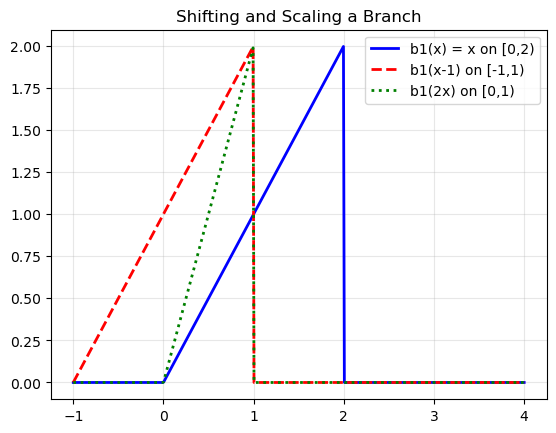

In [6]:
b_shifted = b1.shift(1, name="b1(x-1)")
b_scaled = b1.scale(2, name="b1(2x)")

print(f"b1 = {b1}")
print(f"b1.shift(1) = {b_shifted}")
print(f"b1.scale(2) = {b_scaled}")

x4 = np.linspace(-1, 4, 500)
plt.plot(x4, b1(x4), 'blue', label='b1(x) = x on [0,2)', linewidth=2)
plt.plot(x4, b_shifted(x4), 'red', label='b1(x-1) on [-1,1)', linewidth=2, linestyle='--')
plt.plot(x4, b_scaled(x4), 'green', label='b1(2x) on [0,1)', linewidth=2, linestyle=':')
plt.title('Shifting and Scaling a Branch')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 5: Integration and extreme values

b7 = [-1.  4.  0.] / [1.] on [0.0,4.0]
b7.midpoint = 2.000
b7.extreme = 4.000
∫₁³ b7(x) dx = 7.333333 (error: 8.88e-16)
Analytic solution: 3.333333
Absolute Error: 4.00e+00


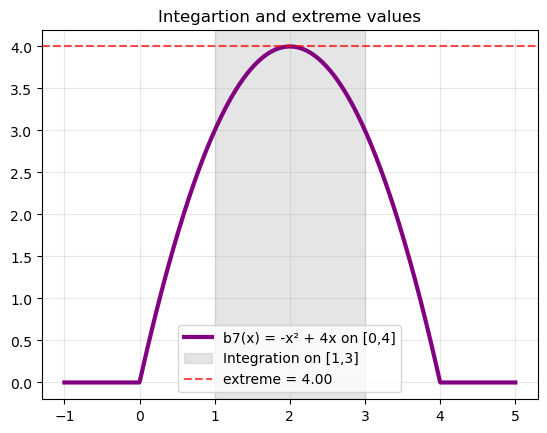

In [7]:
b7 = Branch(
    support=[0, 4],
    numerator=Polynomial([-1, 4, 0]),  # -x² + 4x
    denominator=Polynomial([1]),       # 1
    includes_left_boundary=True,
    includes_right_boundary=True,
    name="b7"
)

print(f"b7 = {b7}")
print(f"b7.midpoint = {b7.midpoint:.3f}")
print(f"b7.extreme = {b7.extreme:.3f}")

# Integration
try:
    integral, error = b7.integral(1, 3)
    print(f"∫₁³ b7(x) dx = {integral:.6f} (error: {error:.2e})")
    
    # Analytic solution is [-x³/3 + 2x²]₁³ = 10/3 ≈ 3.333
    theoretical = 10/3
    print(f"Analytic solution: {theoretical:.6f}")
    print(f"Absolute Error: {abs(integral - theoretical):.2e}")
except Exception as e:
    print(f"Integration failed: {e}")

x5 = np.linspace(-1, 5, 500)
plt.plot(x5, b7(x5), 'purple', label='b7(x) = -x² + 4x on [0,4]', linewidth=3)
plt.axvspan(1, 3, alpha=0.2, color='gray', label='Integration on [1,3]')
plt.axhline(y=b7.extreme, color='red', linestyle='--', alpha=0.7, label=f'extreme = {b7.extreme:.2f}')
plt.title('Integartion and extreme values')
plt.legend()
plt.grid(True, alpha=0.3)

## Example 6: Advanced branch calculations

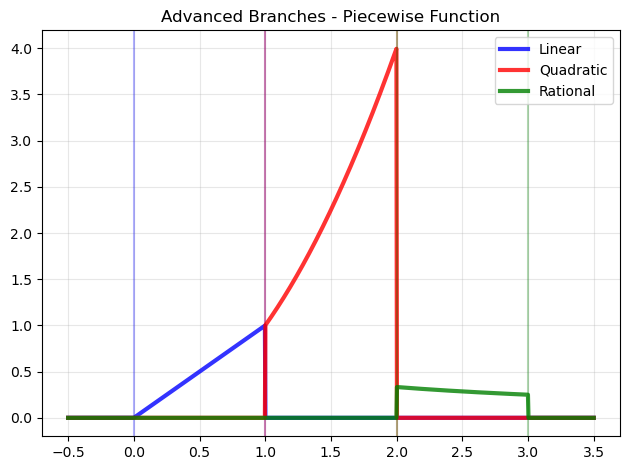

In [8]:
branches = [
    Branch(
        support=[0, 1],
        numerator=Polynomial([1, 0]),  # x
        denominator=Polynomial([1]),   # 1
        name="Linear"
    ),
    Branch(
        support=[1, 2], 
        numerator=Polynomial([1, 0, 0]),  # x²
        denominator=Polynomial([1]),      # 1
        name="Quadratic"
    ),
    Branch(
        support=[2, 3],
        numerator=Polynomial([1]),        # 1
        denominator=Polynomial([1, 1]),   # x + 1
        name="Rational"
    )
]

x6 = np.linspace(-0.5, 3.5, 1000)
colors = ['blue', 'red', 'green']
for i, branch in enumerate(branches):
    plt.plot(x6, branch(x6), color=colors[i], label=branch.name, linewidth=3, alpha=0.8)
    # Σημάνει boundaries
    plt.axvline(x=branch.support[0], color=colors[i], linestyle='-', alpha=0.3)
    plt.axvline(x=branch.support[1], color=colors[i], linestyle='-', alpha=0.3)

plt.title('Advanced Branches - Piecewise Function')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Example 7: Boundary check

In [9]:
test_branch = Branch(
    support=[1, 3],
    numerator=Polynomial([1, 0]),  # x
    includes_left_boundary=False,
    includes_right_boundary=True,
    name="test"
)

test_points = [0.5, 1.0, 1.5, 3.0, 3.5]
print(f"Branch: {test_branch}")
for point in test_points:
    included = test_branch.includes(point)
    value = test_branch(point)
    boundary_status = "OUTSIDE" if not included else "INSIDE"
    print(f"  x={point}: {boundary_status}, b({point}) = {value:.3f}")

Branch: [1. 0.] / [1.] on (1.0,3.0]
  x=0.5: OUTSIDE, b(0.5) = 0.000
  x=1.0: OUTSIDE, b(1.0) = 0.000
  x=1.5: INSIDE, b(1.5) = 1.500
  x=3.0: INSIDE, b(3.0) = 3.000
  x=3.5: OUTSIDE, b(3.5) = 0.000


## Example 8: Common support

In [10]:
support, inc_left, inc_right = Branch.common_support(b1, b2)
print(f"b1: {b1.domain}")
print(f"b2: {b2.domain}")
print(f"Common support: {support}")
print(f"Left boundary included: {inc_left}")
print(f"Right boundary included: {inc_right}")

b1: [0.0,2.0)
b2: (1.0,3.0]
Common support: (1.0, 2.0)
Left boundary included: False
Right boundary included: False


## Example 9: Derivatives

b7 = [-1.  4.  0.] / [1.] on [0.0,4.0]
b7' = [-2.  4.] / [1.] on [0.0,4.0]


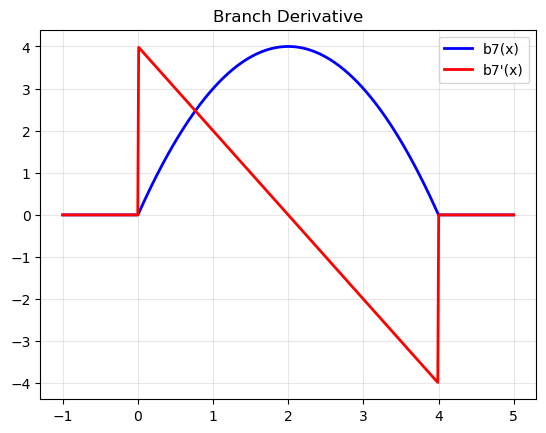

In [11]:
b_deriv = b7.diff(1, name="b7'")
print(f"b7 = {b7}")
print(f"b7' = {b_deriv}")

# Graph
x_deriv = np.linspace(-1, 5, 500)
plt.plot(x_deriv, b7(x_deriv), 'b-', label='b7(x)', linewidth=2)
plt.plot(x_deriv, b_deriv(x_deriv), 'r-', label="b7'(x)", linewidth=2)
plt.title('Branch Derivative')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()